In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np

hf = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")

In [20]:
hf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [21]:
cols = ["age", "anaemia", "ejection_fraction", "sex", "smoking", "DEATH_EVENT"]

desc = hf[cols].describe()

print(desc.to_latex(index=True,
                    caption="Statystyki opisowe zestawu danych",
                    float_format="%.2f",
                    label="tab:opis"))

\begin{table}
\caption{Statystyki opisowe zestawu danych}
\label{tab:opis}
\begin{tabular}{lrrrrrr}
\toprule
 & age & anaemia & ejection_fraction & sex & smoking & DEATH_EVENT \\
\midrule
count & 299.00 & 299.00 & 299.00 & 299.00 & 299.00 & 299.00 \\
mean & 60.83 & 0.43 & 38.08 & 0.65 & 0.32 & 0.32 \\
std & 11.89 & 0.50 & 11.83 & 0.48 & 0.47 & 0.47 \\
min & 40.00 & 0.00 & 14.00 & 0.00 & 0.00 & 0.00 \\
25% & 51.00 & 0.00 & 30.00 & 0.00 & 0.00 & 0.00 \\
50% & 60.00 & 0.00 & 38.00 & 1.00 & 0.00 & 0.00 \\
75% & 70.00 & 1.00 & 45.00 & 1.00 & 1.00 & 1.00 \\
max & 95.00 & 1.00 & 80.00 & 1.00 & 1.00 & 1.00 \\
\bottomrule
\end{tabular}
\end{table}



In [22]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [23]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [24]:
cols = ["age", "anaemia", "ejection_fraction", "sex", "smoking", "DEATH_EVENT"]

desc = hf[cols].head()

print(desc.to_latex(index=True,
                    caption="Statystyki opisowe zestawu danych",
                    float_format="%.2f",
                    label="tab:opis"))

\begin{table}
\caption{Statystyki opisowe zestawu danych}
\label{tab:opis}
\begin{tabular}{lrrrrrr}
\toprule
 & age & anaemia & ejection_fraction & sex & smoking & DEATH_EVENT \\
\midrule
0 & 75.00 & 0 & 20 & 1 & 0 & 1 \\
1 & 55.00 & 0 & 38 & 1 & 0 & 1 \\
2 & 65.00 & 0 & 20 & 1 & 1 & 1 \\
3 & 50.00 & 1 & 20 & 1 & 0 & 1 \\
4 & 65.00 & 1 & 20 & 0 & 0 & 1 \\
\bottomrule
\end{tabular}
\end{table}



<Figure size 800x600 with 0 Axes>

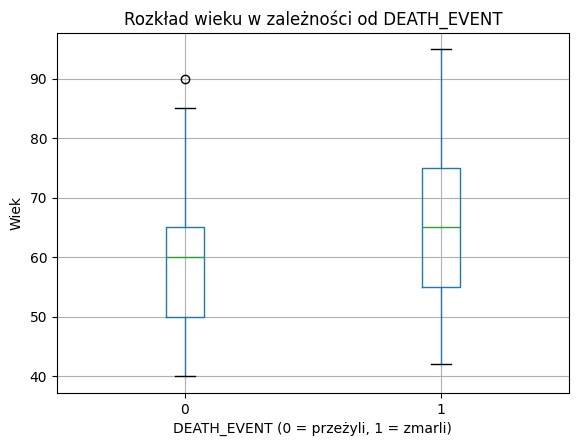

In [25]:
plt.figure(figsize=(8, 6))
hf.boxplot(column='age', by='DEATH_EVENT')
plt.title('Rozkład wieku w zależności od DEATH_EVENT')
plt.suptitle('')
plt.xlabel('DEATH_EVENT (0 = przeżyli, 1 = zmarli)')
plt.ylabel('Wiek')
plt.show()

<Figure size 800x600 with 0 Axes>

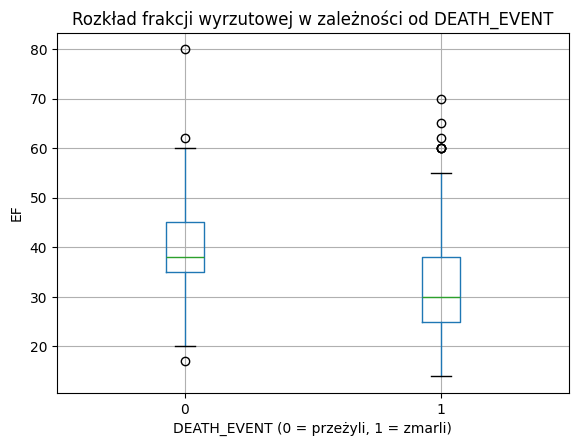

In [26]:
plt.figure(figsize=(8, 6))
hf.boxplot(column='ejection_fraction', by='DEATH_EVENT')
plt.title('Rozkład frakcji wyrzutowej w zależności od DEATH_EVENT')
plt.suptitle('')
plt.xlabel('DEATH_EVENT (0 = przeżyli, 1 = zmarli)')
plt.ylabel('EF')
plt.show()

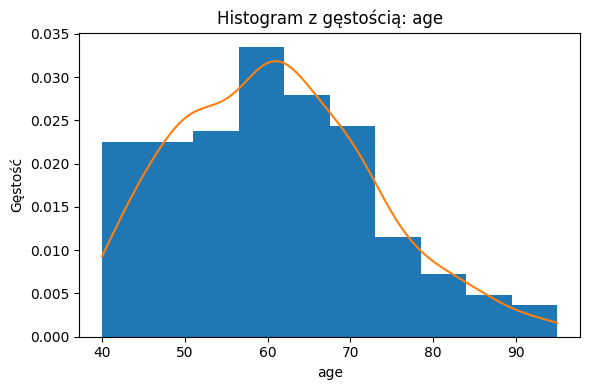

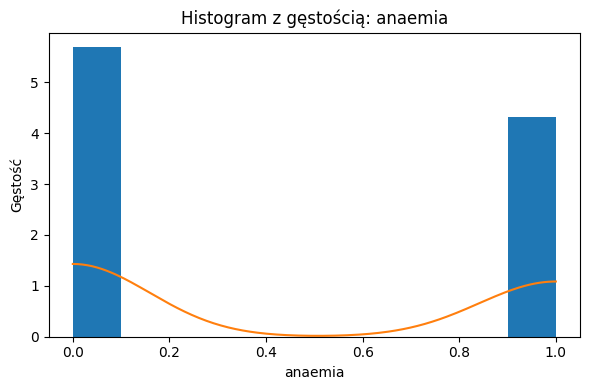

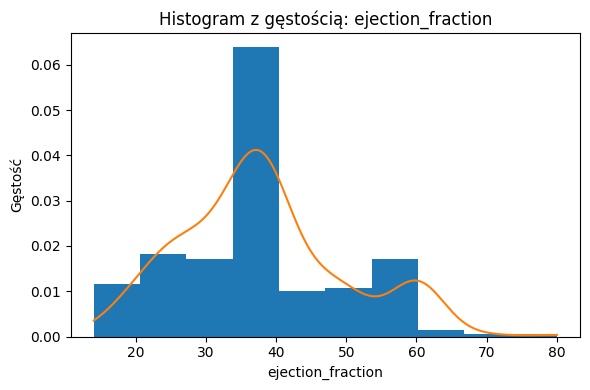

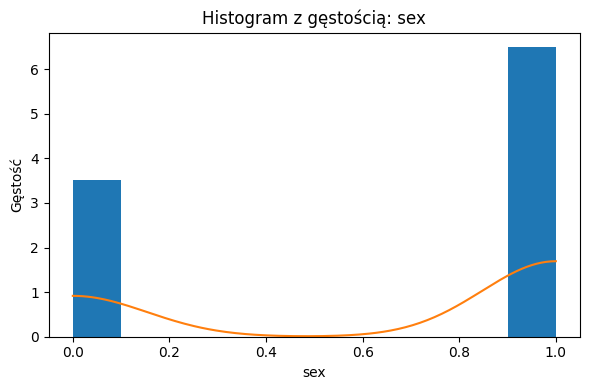

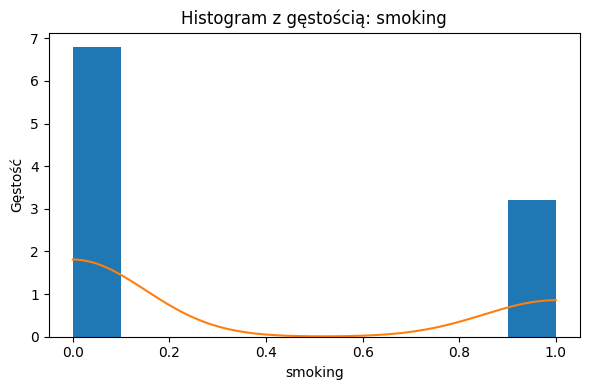

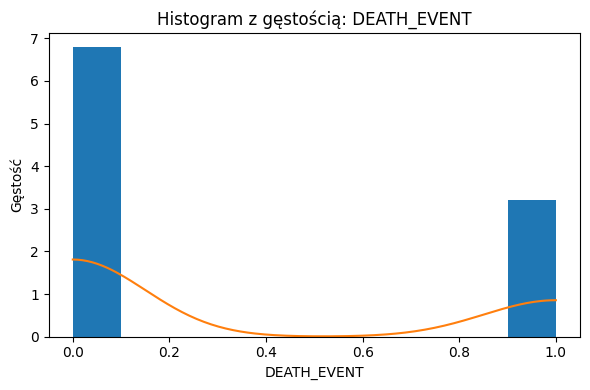

In [27]:
for col in cols:
    data = hf[col].dropna()
    density = gaussian_kde(data)
    xs = np.linspace(data.min(), data.max(), 200)

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=10, density=True)
    plt.plot(xs, density(xs))

    plt.xlabel(col)
    plt.ylabel('Gęstość')
    plt.title(f'Histogram z gęstością: {col}')
    plt.tight_layout()
    plt.show()